# Задание 01

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
from itertools import islice, cycle, combinations
from collections import Counter
from tqdm.notebook import tqdm
%matplotlib inline

import networkx as nx 

Будем работать с сетью, описывающую взаимосвязи между различными заболеваниями, подробнее про даанные можно почитать в [статье](https://www.pnas.org/content/pnas/104/21/8685.full.pdf).

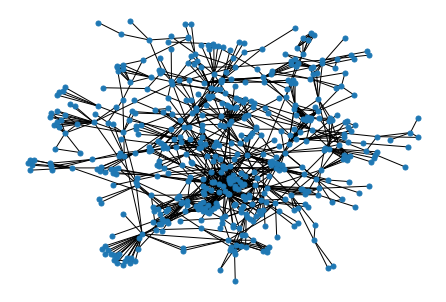

In [2]:
G=nx.read_edgelist('bio-diseasome.txt', nodetype=int)

pos=nx.spring_layout(G,iterations=20)
nx.draw(G,pos,node_size=25,with_labels=False)

## Ответьте на следующие вопросы, ответы введите используя [гугл-форму](https://goo.gl/forms/MLAvh3oe0VN6B9fJ3)

#### 1. Чему равно число вершин, число ребер в сети? 

In [3]:
print('Число вершин: {}'.format(G.number_of_nodes()))
print('Число ребер: {}'.format(G.number_of_edges()))

Число вершин: 516
Число ребер: 1188


#### 2. Является ли сеть направленной? 

In [4]:
print('Сеть направленная?: {}'.format(G.is_directed()))

Сеть направленная?: False


#### 3. Чему равна средняя степень вершины?  

In [5]:
degrees = [d[-1] for d in G.degree()]
print('Cредняя степень вершины: {}'.format(round(sum(degrees)/G.number_of_nodes(), 3)))

Cредняя степень вершины: 4.605


#### 4. Перечислите индексы узлы с максимальным значением степени.  

In [6]:
sorted([(n,d) for n,d in G.degree()], key=lambda x : x[-1], reverse=True)[:3]

[(93, 50), (71, 30), (163, 27)]

#### 5. Постройте распределение по степеням связности и огибающую распределения в двойном логарифмическом масштабе. 
Не забудьте подписать оси. Используйте plt.subplots, чтобы получить одну картинку. Картинку сохраните в формате "Фамилия05.png"

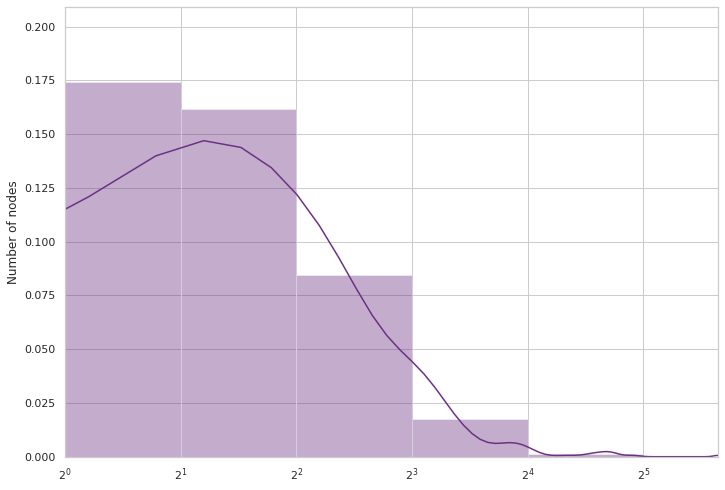

<Figure size 432x288 with 0 Axes>

In [89]:
sortedDegrees = sorted([d for n, d in G.degree()])

a4_dims = (11.7, 8.27)
pal = sns.cubehelix_palette(len(df), reverse=True)
sns.set(style="whitegrid", color_codes=True, palette=pal)

fig, ax = plt.subplots(figsize=a4_dims)
rank = df.argsort().argsort() 
sns.distplot(sortedDegrees, bins=np.logspace(0, 6, base=2, num=7, dtype=int), kde=True, color='#6C3082')
plt.xscale('log', basex=2)
plt.ylabel('Number of nodes')
plt.axis([1, 50.01, 0, 0.209])
plt.show()
plt.savefig('Kim05.png')

#### 6. Сколько вершин имеют степень больше 20? 

In [8]:
print('Number of nodes with degree>20: {}'.format(len([d for n, d in G.degree() if d>20])))

Number of nodes with degree>20: 8


#### 7. Напишите функцию sorted_degree(). 
Функция сортирует пары (index_node, degree) по значению степени в убывающем порядке. 
Выведите топ-10 вершин с наибольшей степенью. 

In [9]:
def sorted_degree(graph):
    sortedDegrees = sorted([(n,d) for n,d in graph.degree()], key=lambda x : x[-1], reverse=True)
    return dict(sortedDegrees[:10])

In [10]:
top10 = sorted_degree(G)
print('Top-10 degrees in graph G:\n')
for key in top10:
    print('Node {}: deg. {}'.format(key, top10[key]))

Top-10 degrees in graph G:

Node 93: deg. 50
Node 71: deg. 30
Node 163: deg. 27
Node 252: deg. 26
Node 457: deg. 26
Node 113: deg. 25
Node 121: deg. 24
Node 357: deg. 23
Node 389: deg. 20
Node 186: deg. 16


#### 8. Сколько всего треугольников в сети? 

In [11]:
print('Число треугольников в сети: {}'.format(sum(nx.triangles(G).values())//3))

Число треугольников в сети: 1360


#### 9. Чему равен средний коэффициент кластеризации в сети? (ответ округлите до сотых)

In [12]:
print('Cредний коэффициент кластеризации в сети: {}'.format(round(nx.average_clustering(G), 2)))

Cредний коэффициент кластеризации в сети: 0.64


#### 10. А чему равен коэффициент транзитивности сети? (ответ округлите до сотых)
Если он меньше или больше среднего коэффициента кластеризации, подумайте, что это может означать. 

In [13]:
print('Коэффициент транзитивности сети: {}'.format(round(nx.transitivity(G), 2)))

Коэффициент транзитивности сети: 0.43


#### 11. Сколько процентов узлов из имеющих максимальную кластеризацию имеют степень два (т.е. являются вершинами треугольников)? (ответ округлите до целого)

In [14]:
sortedDegrees = {k:v for k, v in sorted([(n,d) for n, d in G.degree()], key=lambda x:x[-1], reverse=True) if v==2}

In [15]:
maxClusteringNodes = {k:v for k, v in sorted(nx.clustering(G).items(), key=lambda item: item[1], reverse=True) if v==1.0}

In [16]:
percentage = len([n for n in maxClusteringNodes if n in sortedDegrees])*100//len(maxClusteringNodes)
print('Доля таких узлов: {}%'.format(percentage))

Доля таких узлов: 36%


#### 12. Какова максимальная степень вершины с  минимальной кластеризацией ($C_i=0$)?

In [17]:
minClusteringNodes = [k for k, v in nx.clustering(G).items() if v==0]

In [18]:
maxd_minci = max([(k,v) for k, v in list(G.degree()) if k in minClusteringNodes], key=lambda x:x[-1])
print("Node {}: deg. {}".format(*maxd_minci))

Node 142: deg. 5


#### 13. Какова кластеризация хаба (вершины с максимальной степенью)? (ответ округлите до сотых)

In [19]:
hub = max(list(G.degree()), key=lambda x:x[-1])[0]

In [20]:
print('Hub cludtering coeff.: {}'.format(round(nx.clustering(G, nodes=hub), 2)))

Hub cludtering coeff.: 0.12


#### 14. Постройте диаграмму рассеяния, по оси $Ox$ - значение степени узла, по оси $Oy$ - его коэффициент кластеризации. 
Картинку сохраните в формате "Фамилия14.png"

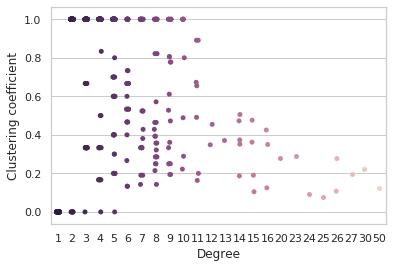

<Figure size 432x288 with 0 Axes>

In [22]:
x = [d for n, d in list(G.degree())]
y = [c for n, c in nx.clustering(G).items()]

sns.stripplot(x=x, y=y, palette=pal)
plt.ylabel('Clustering coefficient')
plt.xlabel('Degree')

plt.show()
plt.savefig('Kim14.png')

#### 15. Верно ли, что все узлы с кластеризацией, превышающей среднее значение, имеют степень меньше 16?

In [23]:
avg_clustering = nx.average_clustering(G)
clusteringByNode = nx.clustering(G).items()
greaterThanAvg = dict(filter(lambda x : x[-1]>avg_clustering, clusteringByNode))
greaterThanAvgDegrees = list(nx.degree(G, nbunch=list(greaterThanAvg.keys())))

len(list(filter(lambda x : x[-1]>=16, greaterThanAvgDegrees)))==0

True

#### 16. Чему равен средний кратчайший путь в сети? (ответ округлите до десятых)

In [90]:
print('Average shortest path length: {}'.format(round(nx.average_shortest_path_length(G), 1)))

Average shortest path length: 6.5


#### 17. А чему равен средний путь от хаба до всех остальных вершин? (ответ округлите до десятых)

In [25]:
hubPaths = nx.single_source_shortest_path_length(G=G, source=hub)
print('Средний путь от хаба до всех остальных вершин: {}'.format(round(sum(hubPaths.values())/len(hubPaths), 1)))

Средний путь от хаба до всех остальных вершин: 4.4


#### 18. Чему равен диаметр сети? 

In [26]:
nx.diameter(G)

15

#### 19. Между какой парой вершин (i,j) ($i\ne j$) число путей длины 4 наибольшее? 

In [27]:
allNodes = list(G.nodes())

In [28]:
nodePairs = list(combinations(allNodes, 2))
pathsOfLength4 = [(i, j, len(list(nx.all_simple_paths(G, i, j, 4)))) for i, j in tqdm(nodePairs)]

In [29]:
print('i = {}, j = {}'.format(*max(pathsOfLength4, key=lambda x:x[-1])[0:2]))

i = 71, j = 93


#### 20. Визуализация сети. 
Представьте структуру сети на ваше усмотрение. Например, можно воспользоваться nx.draw, изменив параметры отрисовки. Можно размер (цвет) вершин сделать зависимым от некоторой топологической характеристики сети (степень, кластеризация и т.п.)  

In [53]:
def draw_(Gk, pos, metrics, rescale_metrics=True):
    def rescale_log(weigths_list):
        cutoff = 1e-20
        for _ in range(len(weigths_list)):
            if weigths_list[_] < cutoff:
                weigths_list[_] = cutoff
        return 1/(np.log(np.array(weigths_list)))
    if rescale_metrics:
        metrics = rescale_log(metrics)
        
#     fig, ax = plt.figure(figsize=(10,20))
    norm = 1000/np.max(metrics)
    options_n = {
    'node_color': [v * norm for v in metrics],
    'node_size': [v * norm/2 for v in metrics],
    'cmap': 'PRGn_r',
    'with_labels': False
    }
    options_e = {
    'line_color': 'grey',
    'linewidths': 0.5,
    'width': 0.5
    }
    nodes = nx.draw_networkx_nodes(G, pos, **options_n)
    nodes.set_edgecolor('grey')
    nx.draw_networkx_edges(G, pos, **options_e)
    plt.savefig('Kim20.png')

In [32]:
closeness = np.array(list(nx.closeness_centrality(G).values()))
katz = np.array(list(nx.katz_centrality_numpy(G).values()))
betweenness = np.array(list(nx.betweenness_centrality(G).values()))
eigenvector = np.array(list(nx.eigenvector_centrality(G).values()))
pagerank = np.array(list(nx.pagerank(G, alpha=0.85).values()))
flow = list(nx.approximate_current_flow_betweenness_centrality(G).values())
exp_deviation_closeness = closeness/np.mean(closeness)

In [37]:
metrics = 1+betweenness+eigenvector+pagerank+flow+0.5*np.array(degrees)

In [38]:
schemes = ['neato', 'dot', 'twopi', 'fdp', 'sfdp', 'circo']

In [52]:
@interact 
def show_graph(scheme = schemes):
    fig = plt.figure(clear=True)
    fig.set_size_inches(20.5, 12.5, forward=True)
    pos = nx.nx_pydot.graphviz_layout(G, prog=scheme, root=hub)
    plt.grid(False)
    plt.axis(False)
    draw_(G, pos, metrics)

interactive(children=(Dropdown(description='scheme', options=('neato', 'dot', 'twopi', 'fdp', 'sfdp', 'circo')…